<a href="https://colab.research.google.com/github/Rawan-Hasan/Predictive-Analysis-of-delhivery-Logistics_/blob/main/Code_of_Predictive_Analysis_of_delhivery_Logistics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predictive-Analysis-of-delhivery-Logistics_

Using the dataset, the firm wants to find opportunities to improve efficiency in operations and understand how the estimated delivery time/distance varies with respect to the actual delivery time/distance.

       
###  Features of the dataset:

- Column Profiling:

| Feature | Description |
|:--------|:------------|
|data| tells whether the data is testing or training data|
|trip_creation_time| Timestamp of trip creation|
|route_schedule_uuid| Unique ID for a particular route schedule|
|**route_type**| **Transportation type**|
|a. FTL–Full Truck Load| FTL shipments get to the destination sooner, as the truck is making no other pickups or drop-offs along the way|
|b. Carting | Handling system consisting of small vehicles (carts)|
|trip_uuid| Unique ID given to a particular trip (A trip may include different source and destination centers)|
|source_center| Source ID of trip origin |
|source_name| Source Name of trip origin |
|destination_center| Destination ID |
|destination_name| Destination Name |
|od_start_time| Trip start time |
|od_end_time| Trip end time |
|start_scan_to_end_scan | Time taken to deliver from source to destination |
|is_cutoff | Unknown field |
|cutoff_factor | Unknown field|
|cutoff_timestamp | Unknown field|
|actual_distance_to_destination | Distance in kms between source and destination warehouse|
|actual_time | Actual time taken to complete the delivery (Cumulative) |
|osrm_time | An open-source routing engine time calculator which computes the shortest path between points in a given map (Includes usual traffic, distance through major and minor roads) and gives the time (Cumulative) |
|osrm_distance | An open-source routing engine which computes the shortest path between points in a given map (Includes usual traffic, distance through major and minor roads) (Cumulative) |
|factor | Unknown field |
| segment_actual_time | This is a segment time. Time taken by the subset of the package delivery|
|segment_osrm_time | This is the OSRM segment time. Time taken by the subset of the package delivery|
| segment_osrm_distance | This is the OSRM distance. Distance covered by subset of the package delivery|
| segment_factor | Unknown field |

**Load  the Dataset**

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import joblib
from sklearn.impute import SimpleImputer
from scipy.stats import zscore
from sklearn.preprocessing import MinMaxScaler,OneHotEncoder
import warnings
warnings.filterwarnings('ignore')

In [ ]:
delhivery_Logistics=pd.read_csv('/content/delhivery.csv')

**view some data from the dataset**

In [ ]:
#view frist row from the dataset
delhivery_Logistics.head()

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:27:55,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:17:55,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:01:19.505586,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:39:57,36.118028,62.0,40.0,45.5620,1.550000,21.0,12.0,13.0224,1.750000
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:33:55,39.386040,68.0,44.0,54.2181,1.545455,6.0,5.0,3.9153,1.200000


In [ ]:
#view last row from the dataset
delhivery_Logistics.tail()

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
144862,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,...,2018-09-20 21:57:20,45.258278,94.0,60.0,67.9280,1.566667,12.0,12.0,8.1858,1.000000
144863,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,...,2018-09-20 21:31:18,54.092531,120.0,76.0,85.6829,1.578947,26.0,21.0,17.3725,1.238095
144864,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,...,2018-09-20 21:11:18,66.163591,140.0,88.0,97.0933,1.590909,20.0,34.0,20.7053,0.588235
144865,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,...,2018-09-20 20:53:19,73.680667,158.0,98.0,111.2709,1.612245,17.0,27.0,18.8885,0.629630
144866,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,...,2018-09-20 16:24:28.436231,70.039010,426.0,95.0,88.7319,4.484211,268.0,9.0,8.8088,29.777778


In [ ]:
#view  data from the dataset
delhivery_Logistics.columns

Index(['data', 'trip_creation_time', 'route_schedule_uuid', 'route_type',
       'trip_uuid', 'source_center', 'source_name', 'destination_center',
       'destination_name', 'od_start_time', 'od_end_time',
       'start_scan_to_end_scan', 'is_cutoff', 'cutoff_factor',
       'cutoff_timestamp', 'actual_distance_to_destination', 'actual_time',
       'osrm_time', 'osrm_distance', 'factor', 'segment_actual_time',
       'segment_osrm_time', 'segment_osrm_distance', 'segment_factor'],
      dtype='object')

**Data inspection**

In [ ]:
#view  how many row & col from the dataset
delhivery_Logistics.shape

(144867, 24)

Data have 24 columns and 144867 rows

In [ ]:
#to know the null data on the dataset
delhivery_Logistics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   data                            144867 non-null  object 
 1   trip_creation_time              144867 non-null  object 
 2   route_schedule_uuid             144867 non-null  object 
 3   route_type                      144867 non-null  object 
 4   trip_uuid                       144867 non-null  object 
 5   source_center                   144867 non-null  object 
 6   source_name                     144574 non-null  object 
 7   destination_center              144867 non-null  object 
 8   destination_name                144606 non-null  object 
 9   od_start_time                   144867 non-null  object 
 10  od_end_time                     144867 non-null  object 
 11  start_scan_to_end_scan          144867 non-null  float64
 12  is_cutoff       

The data types : bool ,float64, int64, object

the data have null values in :source_name & destination_name



> **Statics**



In [ ]:
delhivery_Logistics.describe().T

,count,mean,std,min,25%,50%,75%,max
start_scan_to_end_scan,144867.0,961.262986,1037.012769,20.000000,161.000000,449.000000,1634.000000,7898.000000
cutoff_factor,144867.0,232.926567,344.755577,9.000000,22.000000,66.000000,286.000000,1927.000000
actual_distance_to_destination,144867.0,234.073372,344.990009,9.000045,23.355874,66.126571,286.708875,1927.447705
actual_time,144867.0,416.927527,598.103621,9.000000,51.000000,132.000000,513.000000,4532.000000
osrm_time,144867.0,213.868272,308.011085,6.000000,27.000000,64.000000,257.000000,1686.000000
osrm_distance,144867.0,284.771297,421.119294,9.008200,29.914700,78.525800,343.193250,2326.199100
factor,144867.0,2.120107,1.715421,0.144000,1.604264,1.857143,2.213483,77.387097
segment_actual_time,144867.0,36.196111,53.571158,-244.000000,20.000000,29.000000,40.000000,3051.000000
segment_osrm_time,144867.0,18.507548,14.775960,0.000000,11.000000,17.000000,22.000000,1611.000000
segment_osrm_distance,144867.0,22.829020,17.860660,0.000000,12.070100,23.513000,27.813250,2191.403700


In [ ]:
delhivery_Logistics.describe(include='object').T

,count,unique,top,freq
data,144867,2,training,104858
trip_creation_time,144867,14817,2018-09-28 05:23:15.359220,101
route_schedule_uuid,144867,1504,thanos::sroute:4029a8a2-6c74-4b7e-a6d8-f9e069f...,1812
route_type,144867,2,FTL,99660
trip_uuid,144867,14817,trip-153811219535896559,101
source_center,144867,1508,IND000000ACB,23347
source_name,144574,1498,Gurgaon_Bilaspur_HB (Haryana),23347
destination_center,144867,1481,IND000000ACB,15192
destination_name,144606,1468,Gurgaon_Bilaspur_HB (Haryana),15192
od_start_time,144867,26369,2018-09-21 18:37:09.322207,81


In [ ]:
delhivery_Logistics.describe(include='bool').T

,count,unique,top,freq
is_cutoff,144867,2,True,118749




> **Duplicated**



In [ ]:
delhivery_Logistics.duplicated().sum()

0



> **Missing values**



In [ ]:
delhivery_Logistics.isna().any()

,0
data,False
trip_creation_time,False
route_schedule_uuid,False
route_type,False
trip_uuid,False
source_center,False
source_name,True
destination_center,False
destination_name,True
od_start_time,False


In [ ]:
delhivery_Logistics.isnull().sum()/delhivery_Logistics.shape[0]*100

,0
data,0.000000
trip_creation_time,0.000000
route_schedule_uuid,0.000000
route_type,0.000000
trip_uuid,0.000000
source_center,0.000000
source_name,0.202254
destination_center,0.000000
destination_name,0.180165
od_start_time,0.000000


Only source_name and destination_name have missing values. Destination_name have 0.202254% missing value and Source_name have 0.180165% missing value.

-  Replace missing value  freequency imputer

In [ ]:
freq_imputer = SimpleImputer(strategy = 'most_frequent')
for i in ['source_name', 'destination_name']:
    delhivery_Logistics[i] = pd.DataFrame(freq_imputer.fit_transform(pd.DataFrame(delhivery_Logistics[i])))

In [ ]:
delhivery_Logistics.isna().any()

,0
data,False
trip_creation_time,False
route_schedule_uuid,False
route_type,False
trip_uuid,False
source_center,False
source_name,False
destination_center,False
destination_name,False
od_start_time,False


**Duplicate Detection**

In [ ]:
#to know if data  have unique var on the dataset
for i in delhivery_Logistics.columns:
    if delhivery_Logistics[i].dtypes=='object':
        print(i,delhivery_Logistics[i].unique())
        print(delhivery_Logistics[i].value_counts())
        print('----------------------------------------------------')

data ['training' 'test']
data
training    104858
test         40009
Name: count, dtype: int64
----------------------------------------------------
trip_creation_time ['2018-09-20 02:35:36.476840' '2018-09-23 06:42:06.021680'
 '2018-09-14 15:42:46.437249' ... '2018-09-22 11:30:41.399439'
 '2018-09-17 11:35:28.838714' '2018-09-20 16:24:28.436231']
trip_creation_time
2018-09-28 05:23:15.359220    101
2018-10-02 06:05:53.086094    101
2018-09-27 04:47:19.425867    101
2018-09-22 04:55:04.835022    101
2018-09-29 05:04:57.639067    101
                             ... 
2018-09-27 18:08:18.207639      1
2018-09-28 17:31:07.690205      1
2018-09-29 14:56:33.655170      1
2018-09-19 04:35:44.776558      1
2018-09-14 17:04:32.989471      1
Name: count, Length: 14817, dtype: int64
----------------------------------------------------
route_schedule_uuid ['thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3297ef'
 'thanos::sroute:ff52ef7a-4d0d-4063-9bfe-cc211728881b'
 'thanos::sroute:a16bfa03-3462-4bce



> **Correct Data Types**




- Convert object type To DateTime

In [ ]:
delhivery_Logistics['trip_creation_time']=pd.to_datetime(delhivery_Logistics['trip_creation_time'])
delhivery_Logistics['od_start_time']=pd.to_datetime(delhivery_Logistics['od_start_time'])
delhivery_Logistics['od_end_time']=pd.to_datetime(delhivery_Logistics['od_end_time'])
delhivery_Logistics['cutoff_timestamp']=pd.to_datetime(delhivery_Logistics['cutoff_timestamp'], errors='coerce')

delhivery_Logistics.dtypes

,0
data,object
trip_creation_time,datetime64[ns]
route_schedule_uuid,object
route_type,object
trip_uuid,object
source_center,object
source_name,object
destination_center,object
destination_name,object
od_start_time,datetime64[ns]


In [ ]:
delhivery_Logistics.head()

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:27:55,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:17:55,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,NaT,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:39:57,36.118028,62.0,40.0,45.5620,1.550000,21.0,12.0,13.0224,1.750000
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:33:55,39.386040,68.0,44.0,54.2181,1.545455,6.0,5.0,3.9153,1.200000


 - Convert relevant numeric columns to appropriate numeric types

In [ ]:
numeric_columns=delhivery_Logistics.select_dtypes(include=['number']).columns
numeric_columns

Index(['start_scan_to_end_scan', 'cutoff_factor',
       'actual_distance_to_destination', 'actual_time', 'osrm_time',
       'osrm_distance', 'factor', 'segment_actual_time', 'segment_osrm_time',
       'segment_osrm_distance', 'segment_factor'],
      dtype='object')

In [ ]:
for col in numeric_columns:
    delhivery_Logistics[col] = pd.to_numeric(delhivery_Logistics[col], errors='coerce')

- Convert relevant columns  to `category` type

data and route_type as they only have 2 values

In [ ]:
delhivery_Logistics['route_type'] = delhivery_Logistics['route_type'].astype('category')
delhivery_Logistics['data']=delhivery_Logistics['data'].astype('category')
delhivery_Logistics.dtypes

,0
data,category
trip_creation_time,datetime64[ns]
route_schedule_uuid,object
route_type,category
trip_uuid,object
source_center,object
source_name,object
destination_center,object
destination_name,object
od_start_time,datetime64[ns]


In [ ]:
delhivery_Logistics.head()

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:27:55,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:17:55,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,NaT,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:39:57,36.118028,62.0,40.0,45.5620,1.550000,21.0,12.0,13.0224,1.750000
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:33:55,39.386040,68.0,44.0,54.2181,1.545455,6.0,5.0,3.9153,1.200000


 **Feature Engineering**



> **Trip Duration**



Create a new feature for the time taken for each trip by calculating the difference between start and end times

In [ ]:
# Calculate time difference between trip creation and start
delhivery_Logistics['time_to_start'] = (delhivery_Logistics['od_start_time'] - delhivery_Logistics['trip_creation_time']).dt.total_seconds() /60
delhivery_Logistics['time_taken'] = (delhivery_Logistics['od_end_time'] - delhivery_Logistics['od_start_time']).dt.total_seconds() / 60
print(delhivery_Logistics.head())


       data         trip_creation_time  \
0  training 2018-09-20 02:35:36.476840   
1  training 2018-09-20 02:35:36.476840   
2  training 2018-09-20 02:35:36.476840   
3  training 2018-09-20 02:35:36.476840   
4  training 2018-09-20 02:35:36.476840   

                                 route_schedule_uuid route_type  \
0  thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...    Carting   
1  thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...    Carting   
2  thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...    Carting   
3  thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...    Carting   
4  thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...    Carting   

                 trip_uuid source_center                 source_name  \
0  trip-153741093647649320  IND388121AAA  Anand_VUNagar_DC (Gujarat)   
1  trip-153741093647649320  IND388121AAA  Anand_VUNagar_DC (Gujarat)   
2  trip-153741093647649320  IND388121AAA  Anand_VUNagar_DC (Gujarat)   
3  trip-153741093647649320  IND388121AAA  Anand_VUNagar_



> **Extract time-based features**



Extracted hour, day name, and month name from 'trip_creation_time'

In [ ]:
delhivery_Logistics['hour_of_ day']=delhivery_Logistics['trip_creation_time'].dt.hour
delhivery_Logistics['day_of_week']=delhivery_Logistics['trip_creation_time'].dt.day_name()
delhivery_Logistics['month_of_year']=delhivery_Logistics['trip_creation_time'].dt.month_name()




> **Distance Covered**



In [ ]:
# Create ratio features
delhivery_Logistics['osrm_distance_time_ratio']=delhivery_Logistics['osrm_distance']/delhivery_Logistics['osrm_time']
delhivery_Logistics['distance_time_ratio']=delhivery_Logistics['actual_distance_to_destination']-delhivery_Logistics['actual_time']

In [ ]:
print(delhivery_Logistics[['osrm_distance_time_ratio','distance_time_ratio' ]].head())

   osrm_distance_time_ratio  distance_time_ratio
0                  1.087755            -3.564340
1                  1.086215            -5.063158
2                  1.162125           -12.362721
3                  1.139050           -25.881972
4                  1.232230           -28.613960


In [ ]:
delhivery_Logistics.columns

Index(['data', 'trip_creation_time', 'route_schedule_uuid', 'route_type',
       'trip_uuid', 'source_center', 'source_name', 'destination_center',
       'destination_name', 'od_start_time', 'od_end_time',
       'start_scan_to_end_scan', 'is_cutoff', 'cutoff_factor',
       'cutoff_timestamp', 'actual_distance_to_destination', 'actual_time',
       'osrm_time', 'osrm_distance', 'factor', 'segment_actual_time',
       'segment_osrm_time', 'segment_osrm_distance', 'segment_factor',
       'time_to_start', 'time_taken', 'hour_of_ day', 'day_of_week',
       'month_of_year', 'osrm_distance_time_ratio', 'distance_time_ratio'],
      dtype='object')

**Outlier Detection and Handling**

In [ ]:
numeric_columns=delhivery_Logistics.select_dtypes(include=['number']).columns
numeric_columns

Index(['start_scan_to_end_scan', 'cutoff_factor',
       'actual_distance_to_destination', 'actual_time', 'osrm_time',
       'osrm_distance', 'factor', 'segment_actual_time', 'segment_osrm_time',
       'segment_osrm_distance', 'segment_factor', 'time_to_start',
       'time_taken', 'hour_of_ day', 'osrm_distance_time_ratio',
       'distance_time_ratio'],
      dtype='object')

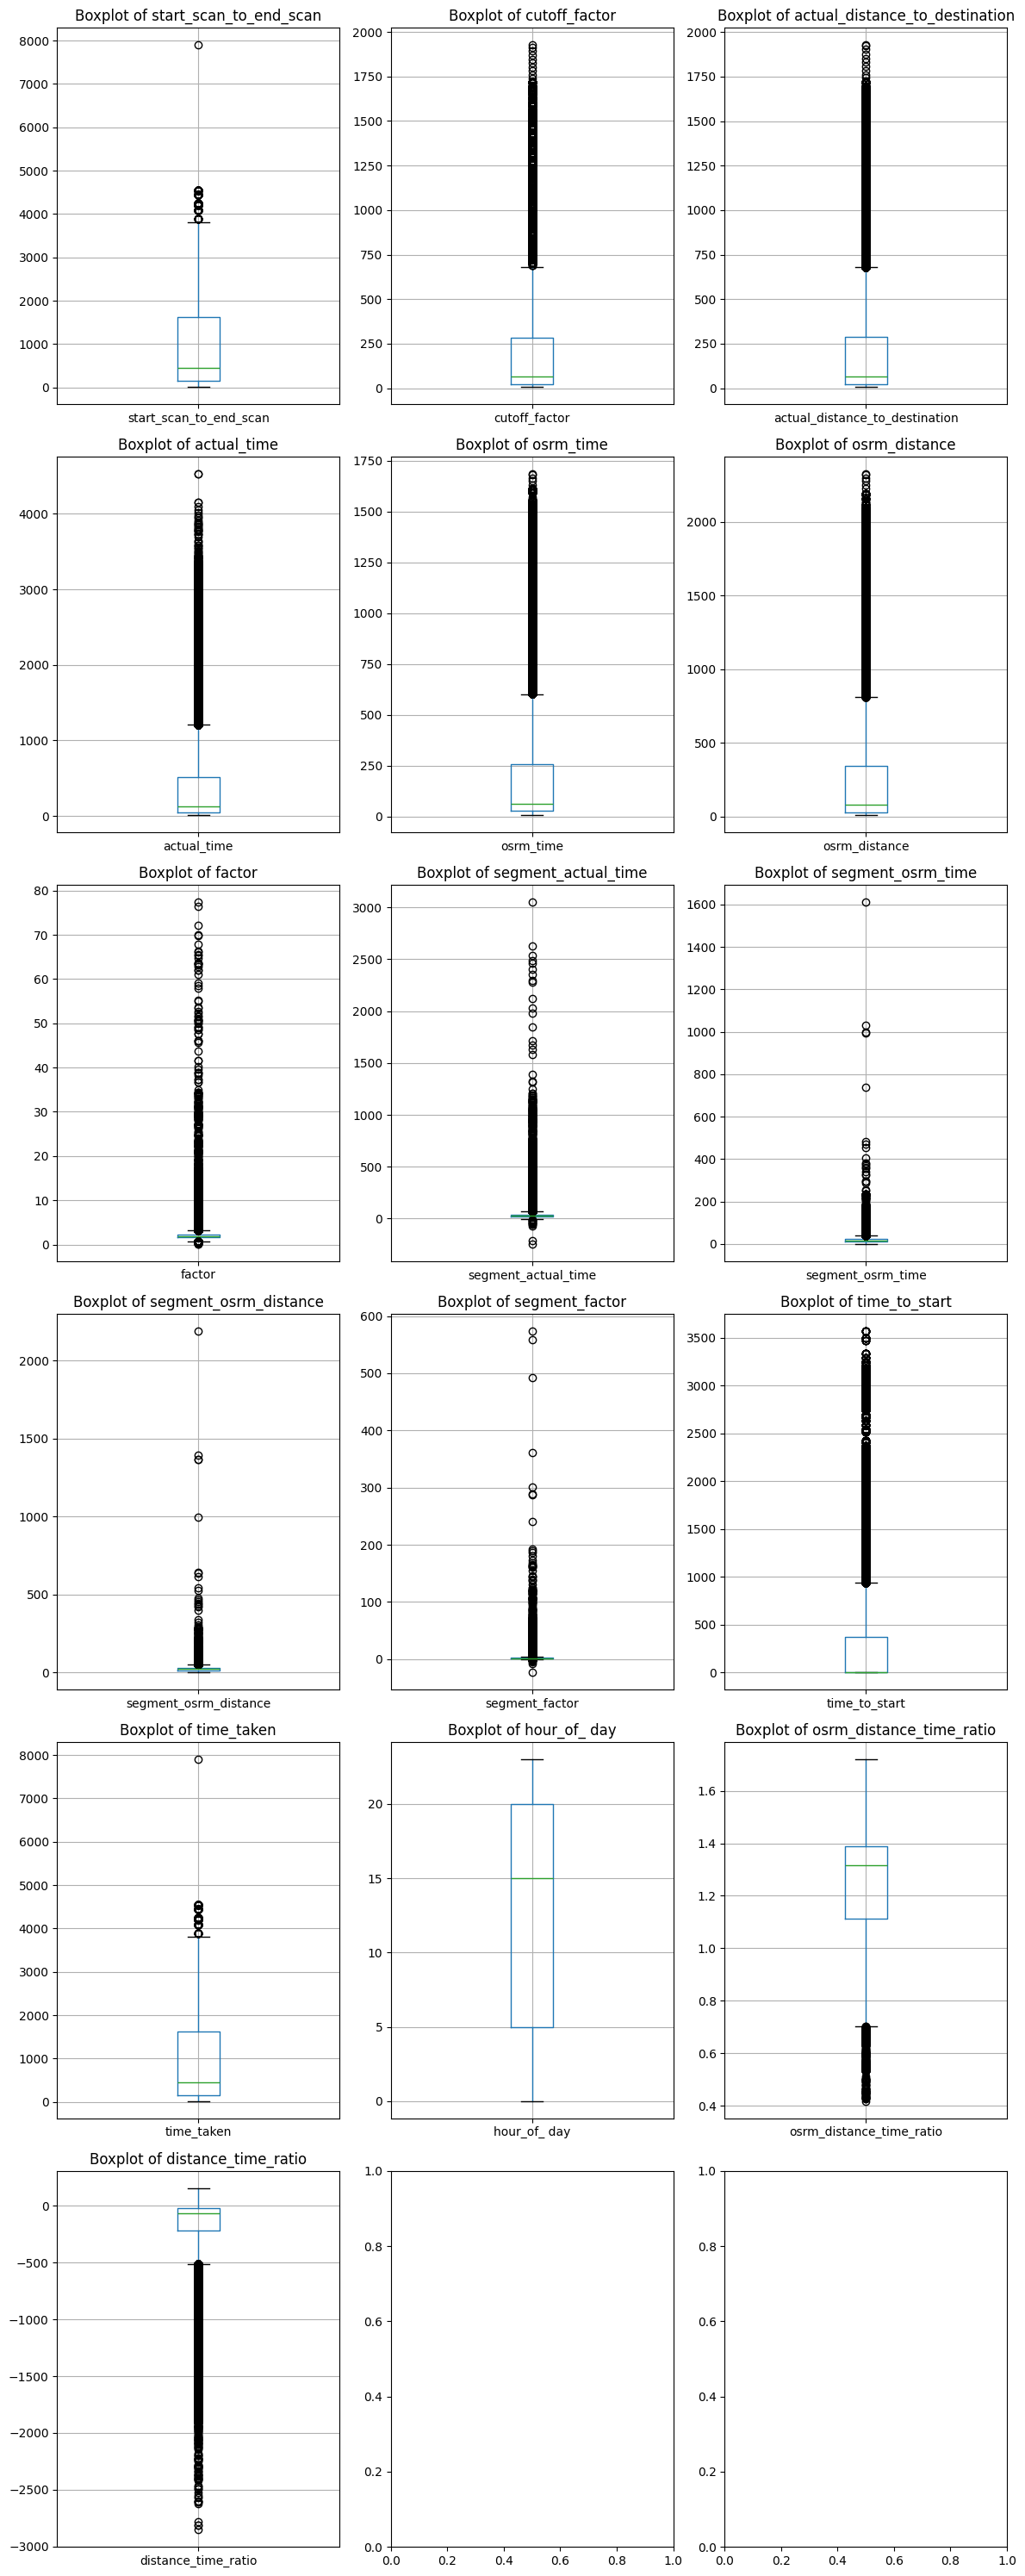

In [ ]:
# Plot outliers for each numerical column
fig, axes = plt.subplots(6, 3, figsize=(12, 30))
axes = axes.flatten()
for i, c in enumerate(numeric_columns):
    delhivery_Logistics.boxplot(column=c, ax=axes[i])
    axes[i].set_title(f'Boxplot of {c}')


plt.tight_layout()
plt.show()

- Detect any outliers in numerical data by IQR OR Z_score

In [ ]:
z_scores = delhivery_Logistics[numeric_columns].apply(zscore)
outliers = (z_scores.abs() > 3).sum()

outliers

,0
start_scan_to_end_scan,350
cutoff_factor,3428
actual_distance_to_destination,3429
actual_time,3526
osrm_time,3595
osrm_distance,3611
factor,1317
segment_actual_time,1208
segment_osrm_time,2113
segment_osrm_distance,1509


- Handle these outliers

In [ ]:
def Handle_outliers(df, columns, lower_threshold=0.01,threshold=0.99):
    for col in columns:
        lower_limit = df[col].quantile(lower_threshold)
        upper_limit = df[col].quantile(threshold)
        df[col] = df[col].clip(lower=lower_limit,upper=upper_limit)
    return df

# Apply capping to handle outliers
delhivery_Logistics = Handle_outliers(delhivery_Logistics, numeric_columns)

<Axes: >

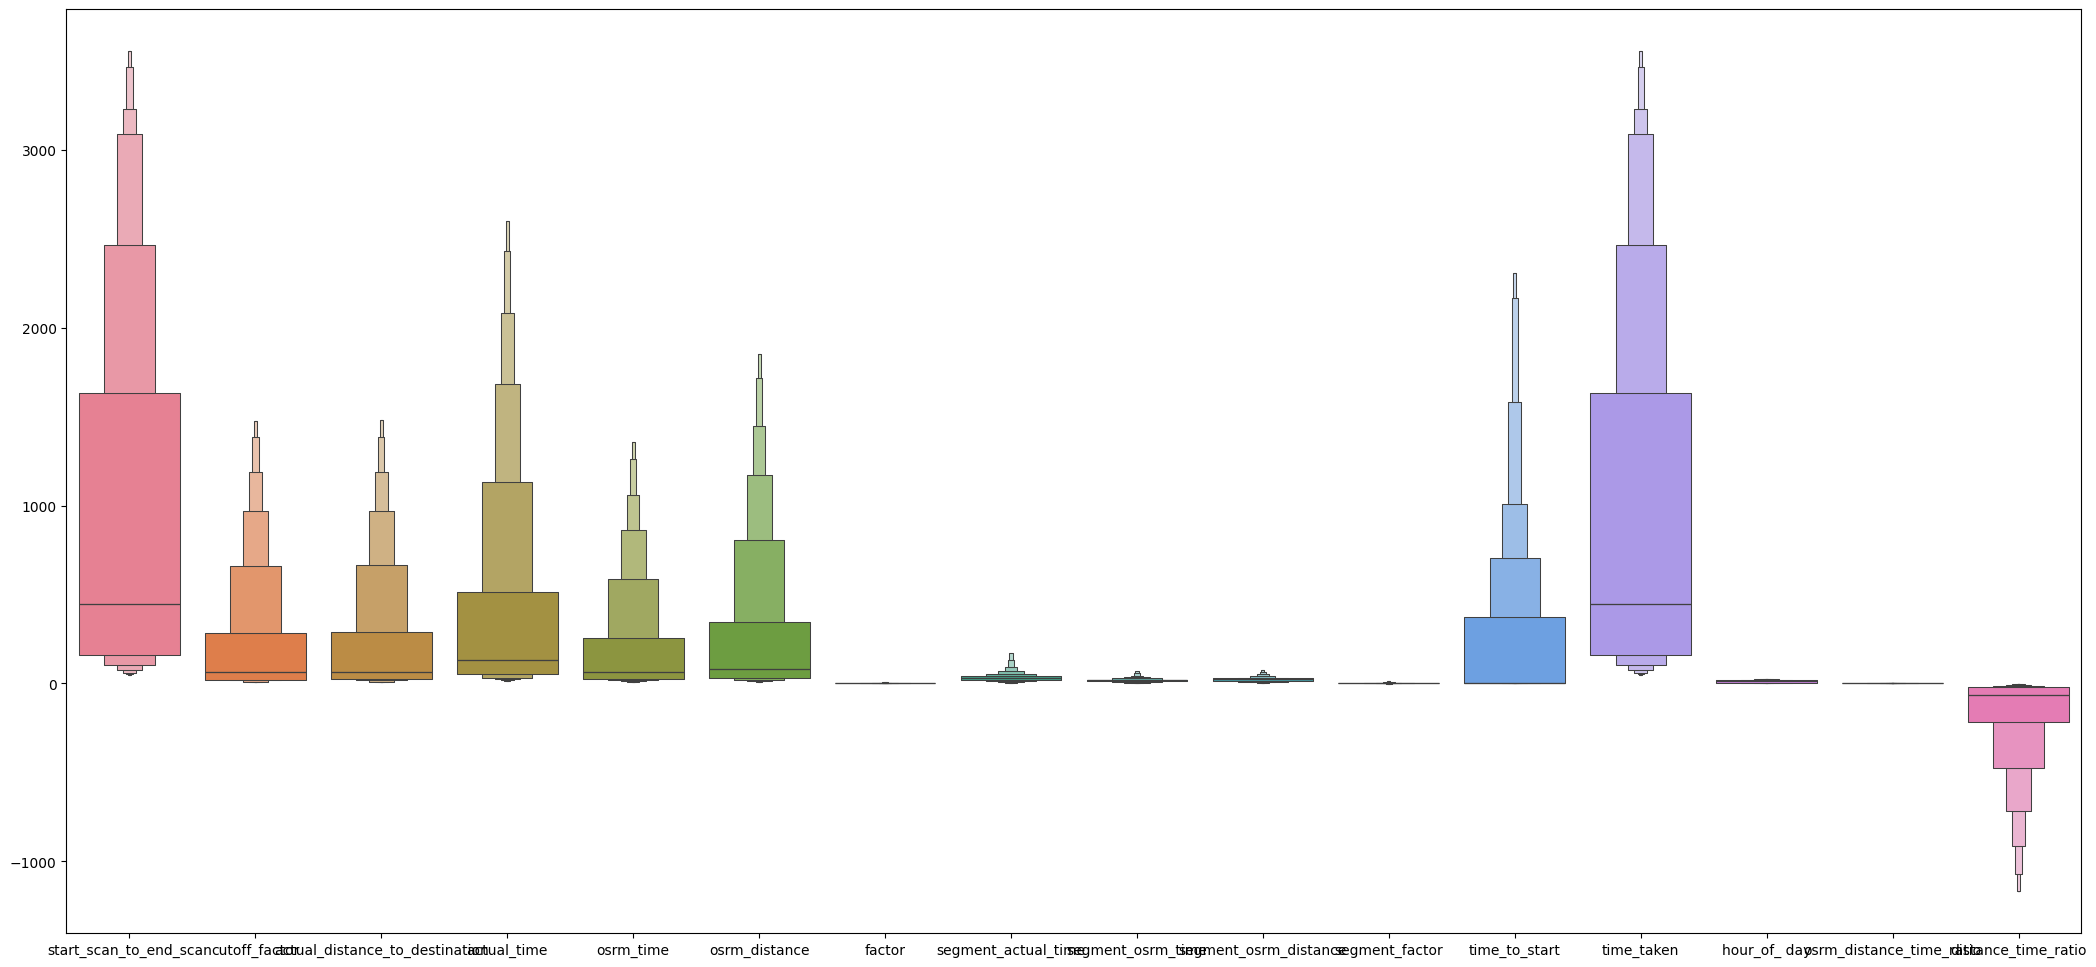

In [ ]:
plt.figure(figsize=(26,12))
sns.boxenplot(data=delhivery_Logistics[numeric_columns])

**Sanitize and Normalize Data**

- Standardize column names to follow a consistent format

In [ ]:
delhivery_Logistics.columns =delhivery_Logistics.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('-', '_')
print("Standardized Column Names:\n", delhivery_Logistics.columns)

Standardized Column Names:
 Index(['data', 'trip_creation_time', 'route_schedule_uuid', 'route_type',
       'trip_uuid', 'source_center', 'source_name', 'destination_center',
       'destination_name', 'od_start_time', 'od_end_time',
       'start_scan_to_end_scan', 'is_cutoff', 'cutoff_factor',
       'cutoff_timestamp', 'actual_distance_to_destination', 'actual_time',
       'osrm_time', 'osrm_distance', 'factor', 'segment_actual_time',
       'segment_osrm_time', 'segment_osrm_distance', 'segment_factor',
       'time_to_start', 'time_taken', 'hour_of__day', 'day_of_week',
       'month_of_year', 'osrm_distance_time_ratio', 'distance_time_ratio'],
      dtype='object')


- Normalize numeric columns using StandardScaler

In [ ]:
scaler = MinMaxScaler()

# List of columns to scale
numeric_columns_1 = ['time_to_start', 'time_taken', 'actual_distance_to_destination', 'actual_time',
                     'osrm_time', 'osrm_distance', 'start_scan_to_end_scan', 'factor',
                     'segment_actual_time', 'segment_osrm_time', 'segment_osrm_distance',
                     'segment_factor', 'osrm_distance_time_ratio', 'distance_time_ratio']

# Apply the MinMaxScaler to the specified columns and store in new columns with '_scaled' suffix
for column in numeric_columns_1:
    delhivery_Logistics[column + '_scaled'] = scaler.fit_transform(delhivery_Logistics[[column]])


**Save Cleaned Data**

In [ ]:
# Save the DataFrame with the original and scaled data to a file
delhivery_Logistics.to_csv('delhivery_Logistics_with_scaled_data.csv', index=False)

In [ ]:
# Display the DataFrame to verify the new scaled columns are added
delhivery_Logistics.tail()

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,osrm_time_scaled,osrm_distance_scaled,start_scan_to_end_scan_scaled,factor_scaled,segment_actual_time_scaled,segment_osrm_time_scaled,segment_osrm_distance_scaled,segment_factor_scaled,osrm_distance_time_ratio_scaled,distance_time_ratio_scaled
144862,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,...,0.038604,0.031346,0.108609,0.113316,0.071006,0.166667,0.105764,0.160000,0.534015,0.959261
144863,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,...,0.050483,0.040997,0.108609,0.115336,0.153846,0.291667,0.224460,0.179048,0.527827,0.944543
144864,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,...,0.059391,0.047199,0.108609,0.117303,0.118343,0.472222,0.267521,0.127059,0.496312,0.937744
144865,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,...,0.066815,0.054906,0.108609,0.120811,0.100592,0.375000,0.244047,0.130370,0.538314,0.928756
144866,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,...,0.064588,0.042654,0.108609,0.593069,1.000000,0.125000,0.113813,1.000000,0.274663,0.695848
